##### 1. Python and Algorithmic Trading

Pure Python

In [3]:
%%time
import random
from math import exp, sqrt

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in range(1000000):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * random.gauss(0, 1) * sqrt(T))

    values.append(ST)

CPU times: user 1.17 s, sys: 33.8 ms, total: 1.2 s
Wall time: 1.21 s


1. The initial index level
2. The constant short rate
3. The time horizon in year fractions
4. The constant volatility factor
5. An empty `list` object to collect simulated values
6. The main `for` loop
7. The simulation of a single end-of-period value
8. Appends the simulated value to the `list` object

##### Numpy

In [4]:
%%time
import numpy as np

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.random.standard_normal(1000000) * np.sqrt(T))

CPU times: user 211 ms, sys: 135 ms, total: 346 ms
Wall time: 319 ms


This single line of NumPy code simulates all the values and stores them in an ndarray object.

***Equation 1-1. Euler discretization of geometric Brownian motion***

$$
S_T = S_0 \exp((r - 0.5 \sigma^2) T + \sigma z \sqrt{T})
$$



Vectorization is a powerful concept for writing concise, easy-to-read, and easy to maintain code in finance and algorithmic trading. With NumPy, vectorized code does not only make code more concise, but it also can speed up code execution considerably (by a factor of about eight in the Monte Carlo simulation, for example).

Numpy is an outgrowth of the Scipy package project which provides a wealth of functionality frequently needed in science. The SciPy project recognized the need for a  more powerful numerical data structure and consolidated older projects like Numeric and NumArray in this area into a new, unifying one in form of NumPy.

In algorithmic trading, a Monte Carlo simulation might not be the most important use case for a programming language. However, if you enter the algorithmic trading space, the management of larger, or even big, financial time series data sets is a very important use case. Just think of the backtesting of (intraday) trading strategies or the processing of tick data streams during trading hours. This is where the pandas data analysis package comes into play.

##### pandas and the DataFrame Class

Development of pandas began in 2008 by Wes McKinney, who back then was working at AQR Capital Management, a big hedge fund operating out of Greenwich, Connecticut. As with for any other hedge fund, working with time series data is of paramount importance for AQR Capital Management, but back then Python did not provide any kind of appealing support for this type of data. Wes's idea was to create a package that mimics the capabilities of the R statistical language (http://r-project.org) in this area. This is reflected, for example, in naming the major class DataFrame, whose counterpart in R is called data.frame. Not being considered close enough to the core business of money management, AQR Capital Management open sourced the pandas project in 2009, which marks the beginning of a major success story in open source-based data and financial analytics.

Partly due to pandas, Python has become a major force in data and financial analytics. Many people who adopt Python, coming from diverse other languages, cite pandas as a major reason for their decision. In combination with open data sources like Quandl, pandas even allows students to do sophisticated financial analytics with the lowest barriers of entry ever: a regular notebook computer with an internet connection suffices.

Assume an algorithmic trader is interested in trading Bitcoin, the cryptocurrency with the largest market cap. A first step might be to retrieve data about the historical exchange rate in USD. Using Quandl data and pandas,such a task is accomplished in less than a minute.

In [19]:
# !pip install seaborn
# %pip install quandl
# %pip install nasdaq-data-link
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [21]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('Solarize_Light2')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [22]:
import configparser
c = configparser.ConfigParser()
c.read('../pyalgo.cfg')

[]

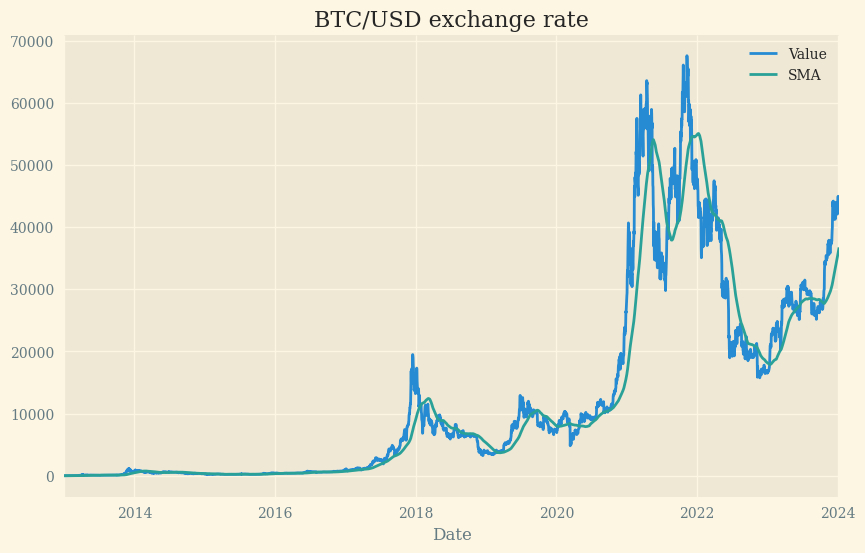

In [23]:
# import quandl as q
import nasdaqdatalink as q
q.ApiConfig.api_key = "MB3HZVew4j_FicbhB5qj"
d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate',
                        figsize=(10,6));

In [32]:
!ls -al ~/.ssh/

total 16
drwxrws---  2 jovyan users 4096 Jun 24 22:45 .
drwxrwsr-x 11 root   users 4096 Jun 25 18:05 ..
-rw-rw----  1 jovyan users 2603 Jun 24 22:45 git
-rw-rw-r--  1 jovyan users  806 Jun 24 22:45 known_hosts
